In [26]:
import matplotlib
%matplotlib inline

!apt-get -y install fonts-ipafont-gothic
import matplotlib
!rm /root/.cache/matplotlib/fontlist-v300.json

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
rm: cannot remove '/root/.cache/matplotlib/fontlist-v300.json': No such file or directory


In [0]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
import pandas as pd
import collections

In [0]:
rail_line = pd.read_csv('graph_connected.csv')
stations = pd.read_csv('stations.csv')

In [3]:
rail_line

,Unnamed: 0,company_cd,company_name,company_name_h,company_name_k,company_name_r,company_type,company_url,e_status_x,e_status_y,has_station_data,lat,line_cd,line_name,line_name_h,line_name_k,lon,rr_cd,station_cd1,station_cd2,zoom
0,5690,18.0,東京メトロ,東京地下鉄株式会社,トウキョウメトロ,東京メトロ,2.0,http://www.tokyometro.jp/,0.0,0.0,True,35.686461,28001,東京メトロ銀座線,東京メトロ銀座線,ギンザセン,139.757208,28.0,2800101,2800102,13.0
1,5691,18.0,東京メトロ,東京地下鉄株式会社,トウキョウメトロ,東京メトロ,2.0,http://www.tokyometro.jp/,0.0,0.0,True,35.686461,28001,東京メトロ銀座線,東京メトロ銀座線,ギンザセン,139.757208,28.0,2800102,2800103,13.0
2,5692,18.0,東京メトロ,東京地下鉄株式会社,トウキョウメトロ,東京メトロ,2.0,http://www.tokyometro.jp/,0.0,0.0,True,35.686461,28001,東京メトロ銀座線,東京メトロ銀座線,ギンザセン,139.757208,28.0,2800103,2800104,13.0
3,5693,18.0,東京メトロ,東京地下鉄株式会社,トウキョウメトロ,東京メトロ,2.0,http://www.tokyometro.jp/,0.0,0.0,True,35.686461,28001,東京メトロ銀座線,東京メトロ銀座線,ギンザセン,139.757208,28.0,2800104,2800105,13.0
4,5694,18.0,東京メトロ,東京地下鉄株式会社,トウキョウメトロ,東京メトロ,2.0,http://www.tokyometro.jp/,0.0,0.0,True,35.686461,28001,東京メトロ銀座線,東京メトロ銀座線,ギンザセン,139.757208,28.0,2800105,2800106,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,5861,18.0,東京メトロ,東京地下鉄株式会社,トウキョウメトロ,東京メトロ,2.0,http://www.tokyometro.jp/,0.0,0.0,True,35.731442,28010,東京メトロ副都心線,東京メトロ副都心線,フクトシンセン,139.686663,28.0,2801011,2801012,12.0
171,5862,18.0,東京メトロ,東京地下鉄株式会社,トウキョウメトロ,東京メトロ,2.0,http://www.tokyometro.jp/,0.0,0.0,True,35.731442,28010,東京メトロ副都心線,東京メトロ副都心線,フクトシンセン,139.686663,28.0,2801012,2801013,12.0
172,5863,18.0,東京メトロ,東京地下鉄株式会社,トウキョウメトロ,東京メトロ,2.0,http://www.tokyometro.jp/,0.0,0.0,True,35.731442,28010,東京メトロ副都心線,東京メトロ副都心線,フクトシンセン,139.686663,28.0,2801013,2801014,12.0
173,5864,18.0,東京メトロ,東京地下鉄株式会社,トウキョウメトロ,東京メトロ,2.0,http://www.tokyometro.jp/,0.0,0.0,True,35.731442,28010,東京メトロ副都心線,東京メトロ副都心線,フクトシンセン,139.686663,28.0,2801014,2801015,12.0


In [0]:
s_from = rail_line['station_cd1']

In [0]:
s_to = rail_line['station_cd2']

In [6]:
s_to

0      2800102
1      2800103
2      2800104
3      2800105
4      2800106
        ...   
170    2801012
171    2801013
172    2801014
173    2801015
174    2801016
Name: station_cd2, Length: 175, dtype: int64

In [0]:
stnm = stations['station_name']

In [8]:
list(stnm[stations['station_cd']==s_to[1]])[0]

'稲荷町'

In [9]:
list(stnm[stations['station_cd']==2800214])[0] == list(stnm[stations['station_cd']==2800912])[0]

True

In [0]:
K = nx.Graph()
K.add_node("日本語")

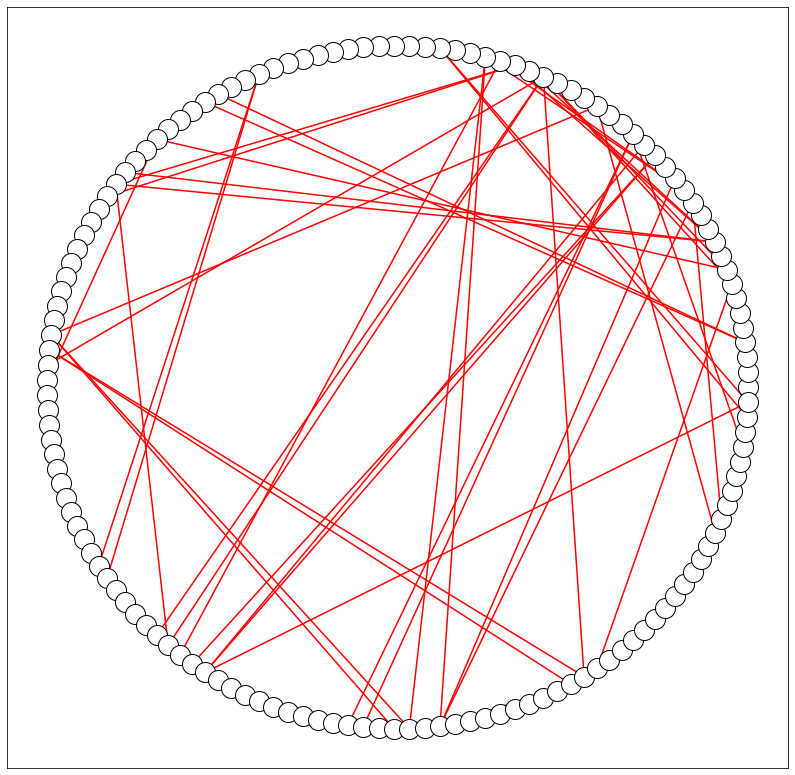

In [15]:
G = nx.Graph()

for s2s in range(len(rail_line)):
  G.add_edge(list(stnm[stations['station_cd']==s_from[s2s]])[0], list(stnm[stations['station_cd']==s_to[s2s]])[0])

pos = nx.spring_layout(G, k=0.3, seed=0)

#描画する
plt.figure(figsize=(14,14)) # 描画サイズ
# ノードをバネモデルで配置する
pos = nx.circular_layout(G)#, k=0.3)

# ノード，エッジ，ラベルの描画
nx.draw_networkx_edges(G, pos, edge_color='red', width=1.5) # リンクを赤色，太さ1.5で描画
nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors="black", node_size=400) #ノードを黒枠の白色，大きさ10で描画
# nx.draw_networkx_labels(G, pos, font_color='blue', fontsize=14, font_family='IPAGothic', font_weight="bold") #ラベルは，青色，sizeが14，IPAGothic(日本語可)，太字

# 描画
plt.show()

In [0]:
def showNetwork(G, node_value=None):
  #描画する
  # 描画サイズ
  plt.figure(figsize=(10,10))
  # ノードをバネモデルで配置する
  pos = nx.spring_layout(G, k=0.3, seed=0)
  # ノード，エッジ，ラベルの描画
  nx.draw_networkx_edges(G, pos, edge_color='red', width=1.5)
  if node_value == None:
    # nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors="black")
  else:
    # nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_nodes(G, pos, node_color=list(node_value.values()), cmap=plt.cm.Reds, edgecolors="black")
  
  # 描画
  plt.show()

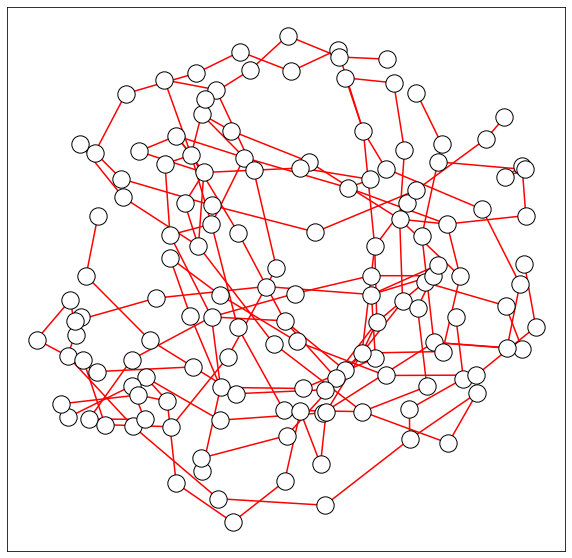

In [45]:
showNetwork(G)

In [0]:
def showDegreeDistribution(G):
  degree = G.degree
  degree_distribution = collections.Counter(dict(degree).values()) # 次数を次数分布のヒストグラムに変換

  # 次数分布をプロットする
  plt.plot(list(degree_distribution.keys()), list(degree_distribution.values()), 'bo') #次数分布をプロット

  # 両対数グラフをやめる場合は，この二つのコメントアウトをします．
  plt.xscale('log') 
  plt.yscale('log')
  plt.show()

  df = pd.DataFrame.from_dict(degree_distribution, orient='index')

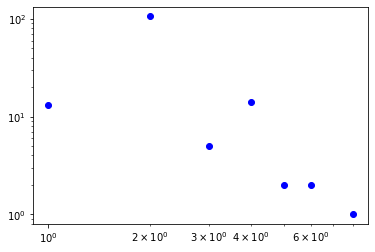

In [22]:
showDegreeDistribution(G)

In [23]:
# 平均経路長
print("平均経路長")
print(nx.average_shortest_path_length(G))
# 直径
print("直径")
print(nx.diameter(G))
# クラスタ係数の平均
print("クラスタ係数の平均")
print(nx.average_clustering(G))

平均経路長
10.150201910765292
直径
30
クラスタ係数の平均
0.024259074259074257


In [0]:
bc = nx.betweenness_centrality(G)

In [0]:
bcrank = sorted(bc.items(),key=lambda x:x[1])

In [43]:
bcrank

143

In [0]:
dc = nx.degree_centrality(G)

In [0]:
dcrank = sorted(dc.items(),key=lambda x:x[1])

In [34]:
dcrank

[('浅草', 0.007042253521126761),
 ('荻窪', 0.007042253521126761),
 ('方南町', 0.007042253521126761),
 ('中目黒', 0.007042253521126761),
 ('中野', 0.007042253521126761),
 ('西船橋', 0.007042253521126761),
 ('北綾瀬', 0.007042253521126761),
 ('代々木上原', 0.007042253521126761),
 ('和光市', 0.007042253521126761),
 ('新木場', 0.007042253521126761),
 ('押上〈スカイツリー前〉', 0.007042253521126761),
 ('赤羽岩淵', 0.007042253521126761),
 ('目黒', 0.007042253521126761),
 ('田原町', 0.014084507042253521),
 ('稲荷町', 0.014084507042253521),
 ('上野広小路', 0.014084507042253521),
 ('末広町', 0.014084507042253521),
 ('神田', 0.014084507042253521),
 ('京橋', 0.014084507042253521),
 ('新橋', 0.014084507042253521),
 ('虎ノ門', 0.014084507042253521),
 ('外苑前', 0.014084507042253521),
 ('渋谷', 0.014084507042253521),
 ('新大塚', 0.014084507042253521),
 ('茗荷谷', 0.014084507042253521),
 ('本郷三丁目', 0.014084507042253521),
 ('御茶ノ水', 0.014084507042253521),
 ('淡路町', 0.014084507042253521),
 ('東京', 0.014084507042253521),
 ('四谷三丁目', 0.014084507042253521),
 ('新宿御苑前', 0.014084507042253521

In [0]:
cc = nx.closeness_centrality(G)

In [0]:
ccrank = sorted(cc.items(),key=lambda x:x[1])

In [37]:
ccrank

[('西船橋', 0.053363397219090565),
 ('原木中山', 0.05634920634920635),
 ('妙典', 0.05963880722385552),
 ('和光市', 0.06029723991507431),
 ('荻窪', 0.06187363834422658),
 ('行徳', 0.06327985739750445),
 ('地下鉄成増', 0.06413730803974707),
 ('南阿佐ケ谷', 0.06592386258124419),
 ('南行徳', 0.06733048838311996),
 ('赤羽岩淵', 0.067458432304038),
 ('地下鉄赤塚', 0.06843373493975903),
 ('新木場', 0.069167072576717),
 ('北綾瀬', 0.06974459724950884),
 ('方南町', 0.07005426739023186),
 ('新高円寺', 0.07047146401985112),
 ('浦安', 0.07186234817813765),
 ('志茂', 0.07230142566191446),
 ('平和台', 0.07327141382868937),
 ('辰巳', 0.07426778242677824),
 ('綾瀬', 0.07493403693931398),
 ('中野富士見町', 0.07529162248144221),
 ('東高円寺', 0.07561235356762513),
 ('浅草', 0.07573333333333333),
 ('葛西', 0.07696476964769648),
 ('南千住', 0.07772304324028462),
 ('王子神谷', 0.07780821917808219),
 ('氷川台', 0.07875762617859124),
 ('豊洲', 0.08009024252679076),
 ('北千住', 0.08086560364464693),
 ('中野新橋', 0.08128219805380653),
 ('新中野', 0.0814687320711417),
 ('目黒', 0.08151549942594719),
 ('田原町',

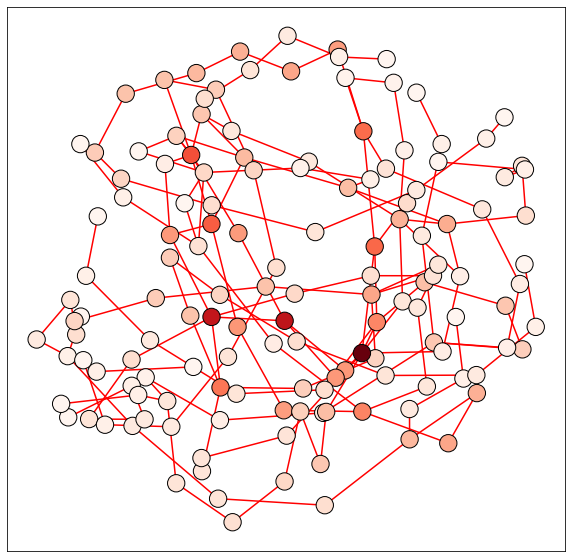

In [38]:
showNetwork(G,nx.betweenness_centrality(G))

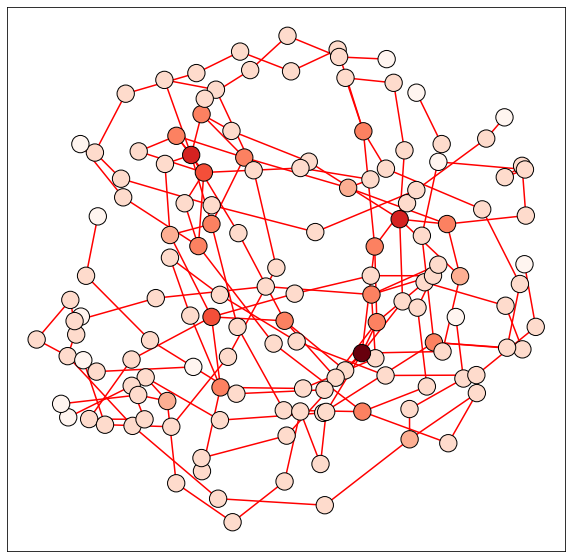

In [42]:
showNetwork(G,nx.degree_centrality(G))

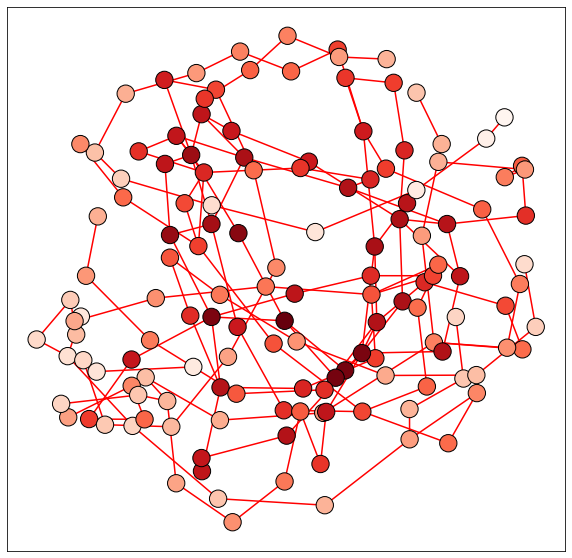

In [41]:
showNetwork(G,nx.closeness_centrality(G))